In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import skew, kurtosis, shapiro

In [2]:
path = "../../Data/CSV_Files/Gas_Demand_Tot.csv"
data = pd.read_csv(path, sep=",")
data["Date"] =  pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)
data = data[["Consumption(Bscf)"]]
data = data.rename(columns={"Consumption(Bscf)":"energy"})
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220 entries, 2019-04-01 to 2001-01-01
Data columns (total 1 columns):
energy    220 non-null float64
dtypes: float64(1)
memory usage: 3.4 KB


,energy
Date,
2019-04-01,2182.901
2019-03-01,2882.561
2019-02-01,2983.892
2019-01-01,3379.295
2018-12-01,2958.554


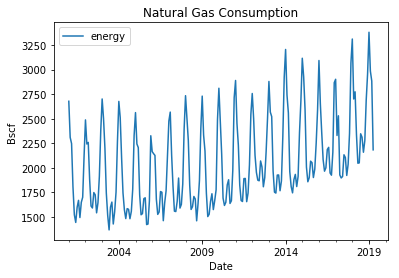

In [3]:
data.plot(title="Natural Gas Consumption")
plt.ylabel("Bscf")
plt.show()

In [4]:
data["year"] = data.index.year
data["qtr"] = data.index.quarter
data["month"] = data.index.month
data["ix"] = range(0,len(data))
data["log(energy)"]=np.log(data["energy"])
data.head()

,energy,year,qtr,month,ix,log(energy)
Date,,,,,,
2019-04-01,2182.901,2019,2,4,0,7.688410
2019-03-01,2882.561,2019,1,3,1,7.966434
2019-02-01,2983.892,2019,1,2,2,8.000984
2019-01-01,3379.295,2019,1,1,3,8.125422
2018-12-01,2958.554,2018,4,12,4,7.992456


In [5]:
mean_of_log = data["log(energy)"].mean()
std_of_log = data["log(energy)"].std()
skew_of_log = data["log(energy)"].skew()
ex_kurt_of_log = data["log(energy)"].kurtosis()

mean = data["energy"].mean()
std = data["energy"].std()
skew = data["energy"].skew()
ex_kurt = data["energy"].kurtosis()

print(f"Mean: {mean} \n Std: {std} \n Skew: {skew} \n Kurtosis: {ex_kurt+3}")
print(f"Mean of log of data: {mean_of_log} \n Std of log of data: {std_of_log} \n Skew of log of data: {skew_of_log} \n Kurtosis of log of data: {ex_kurt_of_log+3}")

Mean: 2059.0168818181814 
 Std: 442.99393249611154 
 Skew: 0.7118853715415384 
 Kurtosis: 2.7540662805723426
Mean of log of data: 7.6080922620166325 
 Std of log of data: 0.20749650438094175 
 Skew of log of data: 0.3589356780166122 
 Kurtosis of log of data: 2.2216998889171578


In [55]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(data["energy"], alpha=0.05)
shapiro_test(data["log(energy)"], alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 1.2110002955978416e-07 is lower than significance level: 0.05, therefore null hypothesis is rejected
H0: Data was drawn from a Normal Ditribution
pval 9.433412924408913e-05 is lower than significance level: 0.05, therefore null hypothesis is rejected


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


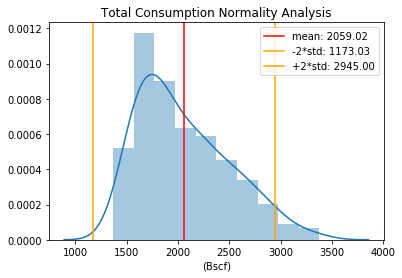

In [7]:
# histogram of unaltered data
sns.distplot(data["energy"])
plt.title("Total Consumption Normality Analysis")
plt.xticks(rotation=0)
plt.xlabel("(Bscf)")
plt.axvline(x=mean, color='r', linestyle='-', label="mean: {0:.2f}".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-',label="-2*std: {0:.2f}".format(mean-2*std))
plt.axvline(x=mean-2*std, color='orange', linestyle='-',label="+2*std: {0:.2f}".format(mean+2*std))
plt.legend()
plt.savefig('../../images/US_consumption/total_consumption_histogram.png', bbox_inches="tight")
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


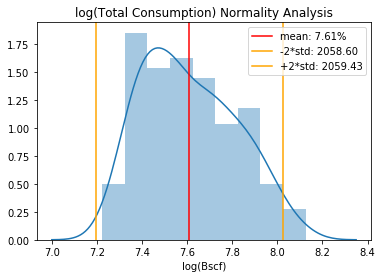

In [8]:
# histogram of log of data
sns.distplot(data["log(energy)"])
plt.title("log(Total Consumption) Normality Analysis")
plt.xticks(rotation=0)
plt.xlabel("log(Bscf)")
plt.axvline(x=mean_of_log, color='r', linestyle='-', label="mean: {0:.2f}%".format(mean_of_log))
plt.axvline(x=mean_of_log+2*std_of_log, color='orange', linestyle='-',label="-2*std: {0:.2f}".format(mean-2*std_of_log))
plt.axvline(x=mean_of_log-2*std_of_log, color='orange', linestyle='-',label="+2*std: {0:.2f}".format(mean+2*std_of_log))
plt.legend()
plt.savefig('../../images/US_consumption/log_of_total_consumption_histogram.png', bbox_inches="tight")
plt.show()

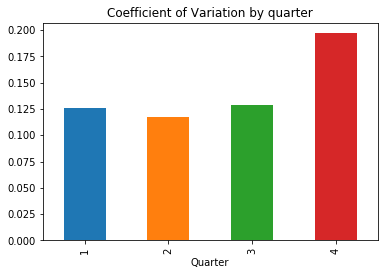

In [9]:
data.groupby("qtr")["energy"].std().divide(data.groupby("qtr")["energy"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation by quarter")
plt.xlabel("Quarter")
plt.savefig('../../images/US_consumption/CV_by_quarter.png', bbox_inches="tight")
plt.show()

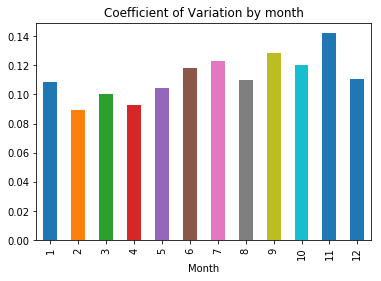

In [10]:
data.groupby("month")["energy"].std().divide(data.groupby("month")["energy"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation by month")
plt.xlabel("Month")
plt.savefig('../../images/US_consumption/CV_by_month.png', bbox_inches="tight")
plt.show()

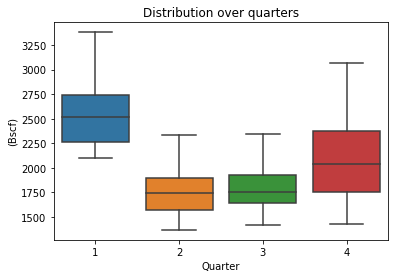

In [11]:
sns.boxplot(data=data, x="qtr", y="energy")
plt.title("Distribution over quarters")
plt.ylabel("(Bscf)")
plt.xlabel("Quarter")
plt.savefig('../../images/US_consumption/distribution_over_quarters.png', bbox_inches="tight")
plt.show()

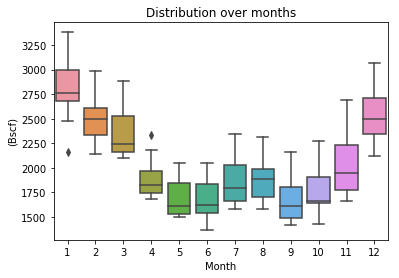

In [12]:
sns.boxplot(data=data, x="month", y="energy")
plt.title("Distribution over months")
plt.ylabel("(Bscf)")
plt.xlabel("Month")
plt.savefig('../../images/US_consumption/distribution_over_month.png', bbox_inches="tight")
plt.show()

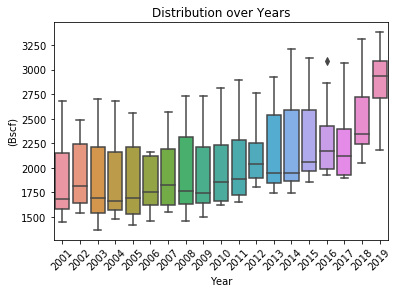

In [13]:
sns.boxplot(data=data, x="year", y="energy")
plt.xticks(rotation=45)
plt.title("Distribution over Years")
plt.ylabel("(Bscf)")
plt.xlabel("Year")
plt.savefig('../../images/US_consumption/distribution_over_years.png', bbox_inches="tight")
plt.show()

In [14]:
data_sorted=data.sort_values(by='ix',ascending=False)
data_sorted["ix"] = range(0,len(data))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


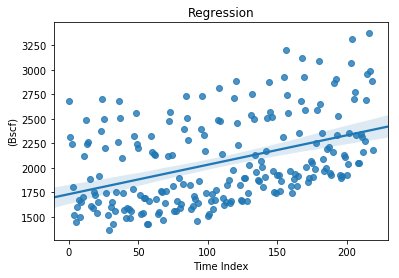

In [15]:
sns.regplot(data=data_sorted,x="ix", y="energy")
plt.title("Regression")
plt.ylabel("(Bscf)")
plt.xlabel("")
plt.xlabel("Time Index")
plt.savefig('../../images/US_consumption/time_trend_regression.png', bbox_inches="tight")
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


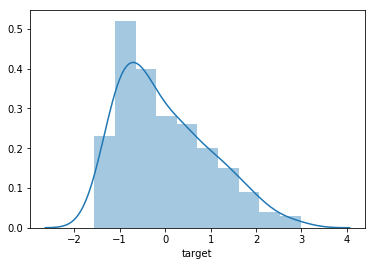

In [16]:
data["target"] = data["energy"].add(-mean).div(std)
sns.distplot(data["target"])
plt.savefig('../../images/US_consumption/normalized_total_consumption_histogram.png', bbox_inches="tight")
plt.show()

In [17]:
shapiro_test(data.target, alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 1.2111112823731673e-07 is lower than significance level: 0.05, therefore null hypothesis is rejected


In [18]:
# Feature Engineering
features = []
corr_features=[]
targets = []
tau = 12
    
data["target_t0"] = data["target"]
targets.append("target_t0")  
    
for t in range(1, tau+1):
    data["feat_" + str(t)] = data["target"].shift(-t)   
    features.append("feat_" + str(t))

In [19]:
features

['feat_1',
 'feat_2',
 'feat_3',
 'feat_4',
 'feat_5',
 'feat_6',
 'feat_7',
 'feat_8',
 'feat_9',
 'feat_10',
 'feat_11',
 'feat_12']

In [20]:
corr = data[targets + features].corr()
print(corr)

           target_t0    feat_1    feat_2    feat_3    feat_4    feat_5  \
target_t0   1.000000  0.783496  0.413408  0.054986 -0.144500 -0.190452   
feat_1      0.783496  1.000000  0.787469  0.414951  0.052025 -0.148973   
feat_2      0.413408  0.787469  1.000000  0.783637  0.400462  0.034105   
feat_3      0.054986  0.414951  0.783637  1.000000  0.778599  0.387567   
feat_4     -0.144500  0.052025  0.400462  0.778599  1.000000  0.773298   
feat_5     -0.190452 -0.148973  0.034105  0.387567  0.773298  1.000000   
feat_6     -0.199056 -0.193558 -0.164489  0.019307  0.376089  0.770493   
feat_7     -0.201180 -0.199976 -0.200277 -0.172037  0.011473  0.374747   
feat_8     -0.176156 -0.201626 -0.204220 -0.205363 -0.180206  0.008641   
feat_9      0.013722 -0.177187 -0.209249 -0.213176 -0.219811 -0.189041   
feat_10     0.383950  0.012826 -0.185397 -0.219200 -0.229198 -0.230083   
feat_11     0.764886  0.383960  0.012558 -0.187807 -0.224827 -0.232172   
feat_12     0.946179  0.764964  0.3868

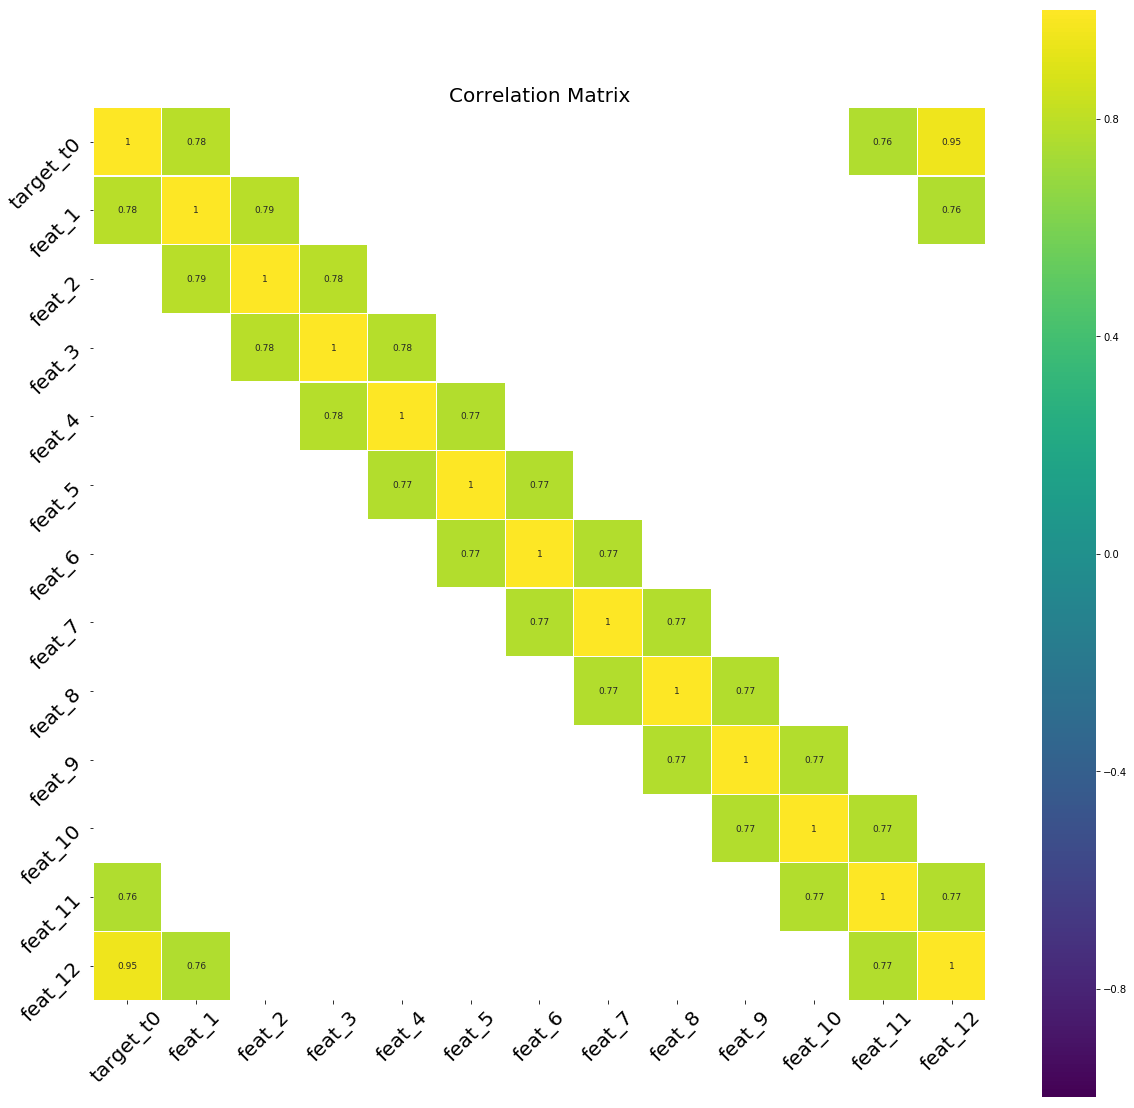

In [69]:
plt.figure(figsize=(20,20))
Corr_thr_DepVSInd = 0.5
sns.heatmap(corr[(corr >= Corr_thr_DepVSInd) | (corr <= -Corr_thr_DepVSInd)],
          cmap="viridis",vmax=1.0, vmin=-1.0, linewidths=0.1,
          annot=True,annot_kws={"size":9},square=True)

plt.title("Correlation Matrix", fontsize=20)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20,rotation=45)
plt.savefig('../../images/US_consumption/US_consumption_correlation_matrix.png', bbox_inches="tight")
plt.show()

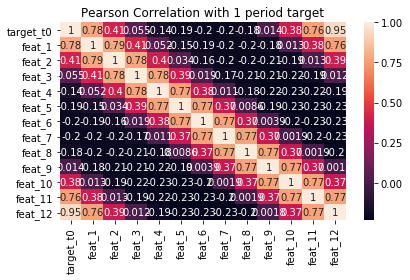

In [22]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True)
plt.title("Pearson Correlation with 1 period target")
plt.yticks(rotation=0); plt.xticks(rotation=90)
plt.tight_layout() 
plt.show() 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


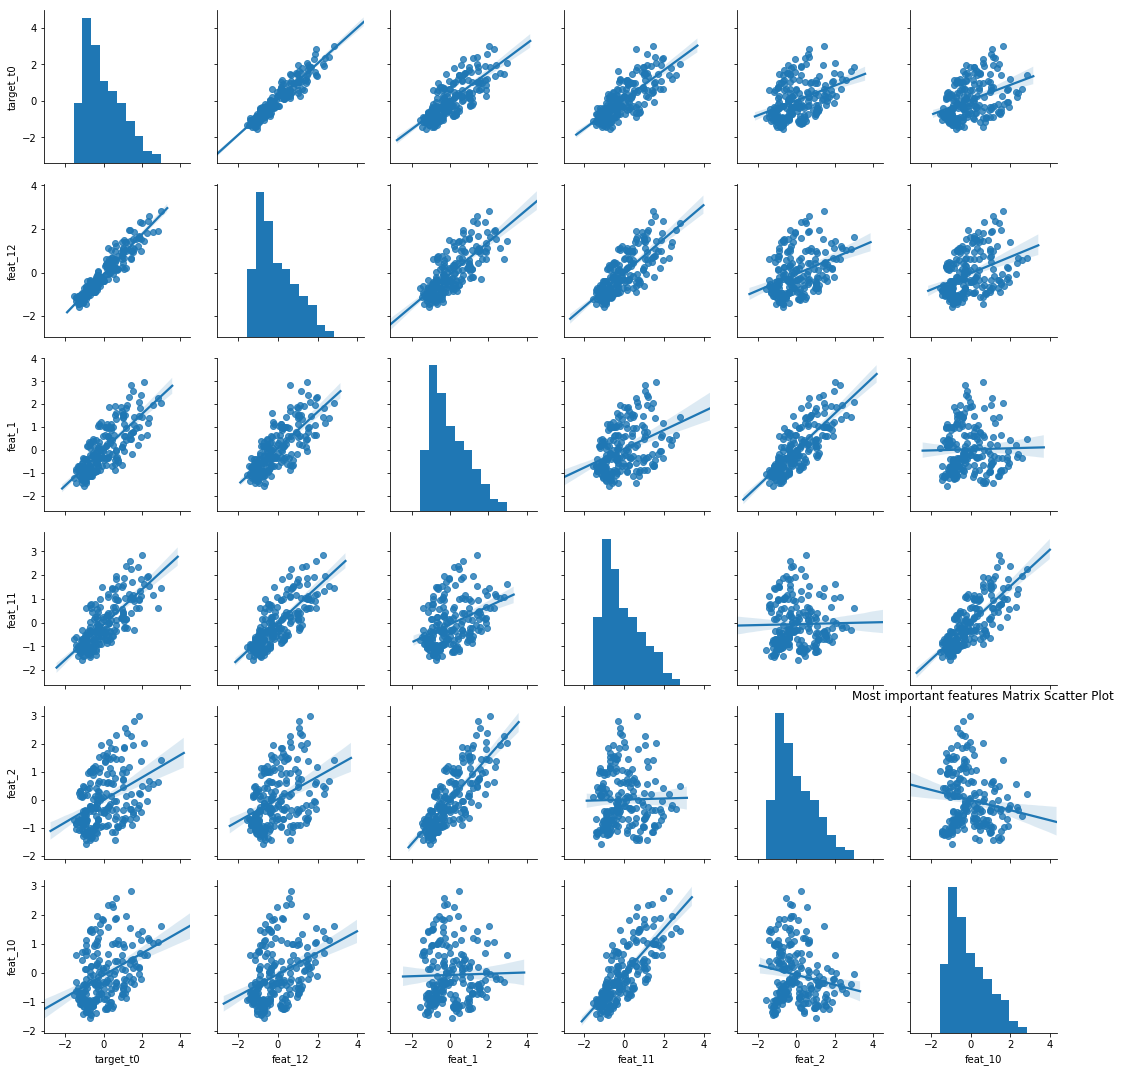

In [23]:
top5_mostCorrFeats = corr["target_t0"].apply(abs).sort_values(ascending=False).index.values[:6]
sns.pairplot(data=data[top5_mostCorrFeats].dropna(), kind="reg")
plt.title("Most important features Matrix Scatter Plot")
plt.savefig('../../images/US_consumption/UScons_most_imp_features_correlation_matrix.png', bbox_inches="tight")
plt.show()


In [24]:
data_feateng = data[["year"] + features + targets].dropna()
nobs= len(data_feateng)
print("Number of observations: ", nobs)

Number of observations:  208


In [25]:
data_feateng.head()

,year,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,target_t0
Date,,,,,,,,,,,,,,
2019-04-01,2019,1.859042,2.087783,2.980353,2.030586,1.419835,0.490517,0.224681,0.569654,0.648759,-0.019582,-0.027655,0.625752,0.279652
2019-03-01,2019,2.087783,2.980353,2.030586,1.419835,0.490517,0.224681,0.569654,0.648759,-0.019582,-0.027655,0.625752,1.612408,1.859042
2019-02-01,2019,2.980353,2.030586,1.419835,0.490517,0.224681,0.569654,0.648759,-0.019582,-0.027655,0.625752,1.612408,1.447505,2.087783
2019-01-01,2019,2.030586,1.419835,0.490517,0.224681,0.569654,0.648759,-0.019582,-0.027655,0.625752,1.612408,1.447505,2.824843,2.980353
2018-12-01,2018,1.419835,0.490517,0.224681,0.569654,0.648759,-0.019582,-0.027655,0.625752,1.612408,1.447505,2.824843,2.272627,2.030586


Total number of observations:  208
Train: (180, 12)(180, 1), 
Test: (28, 12)(28, 1)


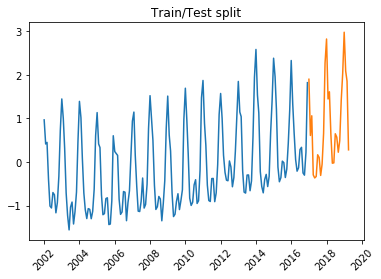

In [26]:
# split into train/test data
train_test_split = 2017
X_train = data_feateng[features].loc[data_feateng["year"]<train_test_split]
y_train = data_feateng[targets].loc[data_feateng["year"]<train_test_split]

X_test = data_feateng[features].loc[data_feateng["year"]>=train_test_split]
y_test = data_feateng[targets].loc[data_feateng["year"]>=train_test_split]

n, k = X_train.shape
print("Total number of observations: ", nobs)
print("Train: {}{}, \nTest: {}{}".format(X_train.shape, y_train.shape,
                                              X_test.shape, y_test.shape))
plt.plot(y_train.index, y_train["target_t0"], label="train")
plt.plot(y_test.index, y_test["target_t0"], label="test")

plt.title("Train/Test split")
plt.xticks(rotation=45)
plt.savefig('../../images/US_consumption/train_test_split.png', bbox_inches="tight")
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train["target_t0"])
p_train_reg = reg.predict(X_train)
p_test_reg = reg.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train["target_t0"], p_train_reg))
RMSE_test = np.sqrt(mean_squared_error(y_test["target_t0"], p_test_reg))
R2_train = r2_score(y_train["target_t0"], p_train_reg)
R2_test = r2_score(y_test["target_t0"], p_test_reg)

print("Train RMSE: {}\nTest RMSE: {}".format(RMSE_train, RMSE_test) )
print("Train R2: {}\nTest R2: {}".format(R2_train, R2_test) )

Train RMSE: 0.25060931780879003
Test RMSE: 0.42205999003914185
Train R2: 0.9282892653467756
Test R2: 0.8138904606620475


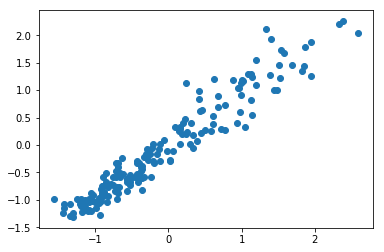

In [28]:
plt.scatter(y_train["target_t0"], p_train_reg, label="train")
plt.savefig('../../images/US_consumption/regression_train_data.png', bbox_inches="tight")

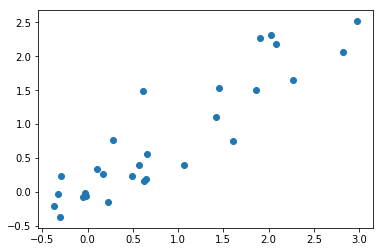

In [29]:
plt.scatter(y_test["target_t0"], p_test_reg, label="test")
plt.savefig('../../images/US_consumption/regression_test_data.png', bbox_inches="tight")

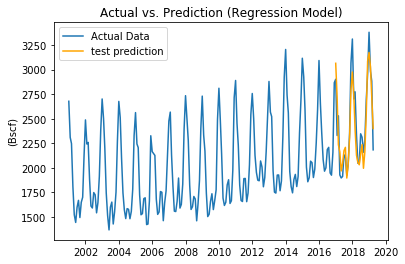

In [30]:
test_df_reg = y_test[["target_t0"]]*std+mean
test_df_reg["pred_t0"] = p_test_reg*std+mean

train_df_reg = y_train[["target_t0"]]*std+mean
train_df_reg["pred_t0"] = p_train_reg*std+mean

plt.plot(data["energy"], label="Actual Data")
plt.plot(test_df_reg[["pred_t0"]], label="test prediction", color="orange")
plt.title("Actual vs. Prediction (Regression Model)")
plt.ylabel("(Bscf)")
plt.legend()
plt.savefig('../../images/US_consumption/regression_actual_vs_pred.png', bbox_inches="tight")
plt.show()

In [99]:
# create CSV with results
df_fitreg = pd.DataFrame(test_df_reg)
df_fitreg.drop(columns='target_t0',inplace=True)
df_fitreg.columns = ["Date","ForCon"]
df_fitreg = df_fitreg.set_index(["Date"])
df_fitreg.to_csv("../../Data/CSV_Files/RegressionML.csv", encoding='utf-8')
df_fitreg

,ForCon
Date,
2019-04-01,2399.527875
2019-03-01,2723.062210
2019-02-01,3027.657523
2019-01-01,3173.904654
2018-12-01,3085.951802
2018-11-01,2549.889699
2018-10-01,2163.229390
2018-09-01,1995.350670
2018-08-01,2236.550229


In [71]:
RMSE_train_rf = np.sqrt(mean_squared_error(y_train["target_t0"], p_train_rf))
RMSE_test_rf = np.sqrt(mean_squared_error(y_test["target_t0"], p_test_rf))
R2_train_rf = r2_score(y_train["target_t0"], p_train_rf)
R2_test_rf = r2_score(y_test["target_t0"], p_test_rf)

print("Train RMSE: {}\nTest RMSE: {}".format(RMSE_train_rf, RMSE_test_rf) )
print("Train R2: {}\nTest R2: {}".format(R2_train_rf, R2_test_rf) )

Train RMSE: 0.10101351008120345
Test RMSE: 0.4688311633977166
Train R2: 0.9883493899058569
Test R2: 0.7703570015369096


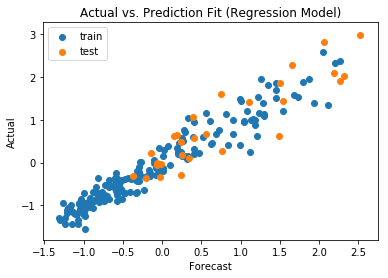

In [31]:
plt.scatter(y=y_train["target_t0"],x=p_train_reg, label="train")
plt.scatter(y=y_test["target_t0"],x=p_test_reg, label="test")
plt.title("Actual vs. Prediction Fit (Regression Model)")
plt.ylabel("Actual")
plt.xlabel("Forecast")
plt.legend()
plt.savefig('../../images/US_consumption/regression_actual_vs_pred_fit.png', bbox_inches="tight")
plt.show()

In [35]:
# Random Forest Model
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid
from sklearn.ensemble import RandomForestRegressor

def TimeSplit_ModBuild(model, paramGrid, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error

    for train_index, val_index in splits.split(X_train):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]

        train_scores = []
        val_scores = []
        
        # Loop through  parameter grid, set the hyperparameters, save scores
        for g in paramGrid:
            model.set_params(**g)
            model.fit(_X_train_, _y_train_)
            p_train_rf = model.predict(_X_train_)
            p_val = model.predict(_X_val_)
            score_train = np.mean(mean_squared_error(_y_train_, p_train_rf))
            score_val = np.mean(mean_squared_error(_y_val_, p_val))
            train_scores.append(score_train)
            val_scores.append(score_val)
            best_idx = np.argmin(val_scores)
            
        print("Best-Fold HyperParams:: ", paramGrid[best_idx])
        print("Best-Fold Train RMSE: ", train_scores[best_idx])
        print("Best-Fold Val RMSE: ",val_scores[best_idx])
        print("\n")
        
    return train_scores, val_scores, best_idx

splits = TimeSeriesSplit(n_splits=3, max_train_size=12*2)
rfr = RandomForestRegressor()

# Create dictionary of hyperparameters to search
rfr_grid = {"n_estimators": [500], 
        'max_depth': [3, 5, 10, 20, 30], 
        'max_features': [10, 4, 6, 8, 12], 
        'random_state': [123]}

rfr_paramGrid = ParameterGrid(rfr_grid)

CV_rfr_tup = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X_train, y_train["target_t0"])

Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 12, 'max_depth': 10}
Best-Fold Train RMSE:  0.009495796640394174
Best-Fold Val RMSE:  0.17467597972518006


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 8, 'max_depth': 20}
Best-Fold Train RMSE:  0.014769634672418161
Best-Fold Val RMSE:  0.10737313162262965


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 10, 'max_depth': 10}
Best-Fold Train RMSE:  0.013656859534918289
Best-Fold Val RMSE:  0.11120020084599078




In [36]:
CV_rfr_tup[2]


10

In [37]:
rfr_paramGrid[CV_rfr_tup[2]]


{'random_state': 123, 'n_estimators': 500, 'max_features': 10, 'max_depth': 10}

In [38]:
best_rfr_idx = CV_rfr_tup[2]
best_rfr_grid = rfr_paramGrid[best_rfr_idx]
best_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
    fit(X_train, y_train["target_t0"])

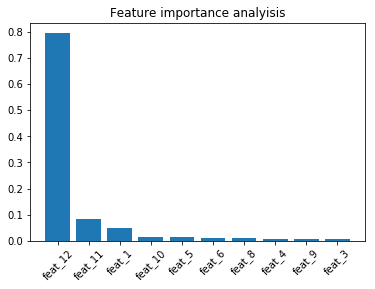

In [39]:
# Get feature importances from our random forest model
importances = best_rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
sorted_index_top = sorted_index[:10]
x = range(len(sorted_index_top))

# Create tick labels 
labels = np.array(features)[sorted_index_top]
plt.bar(x, importances[sorted_index_top], tick_label=labels)
plt.title("Feature importance analyisis")
plt.xticks(rotation=45)
plt.savefig('../../images/US_consumption/random_forest_feature_importance.png', bbox_inches="tight")
plt.show()

In [41]:
p_train_rf = best_rfr.predict(X_train)
train_resid_1step = y_train["target_t0"]- p_train_rf

p_test_rf = best_rfr.predict(X_test)
test_resid = y_test["target_t0"]- p_test_rf

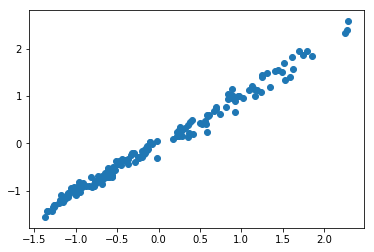

In [42]:
plt.scatter(p_train_rf, y_train["target_t0"])
plt.savefig('../../images/US_consumption/random_forest_train_data.png', bbox_inches="tight")
plt.show()

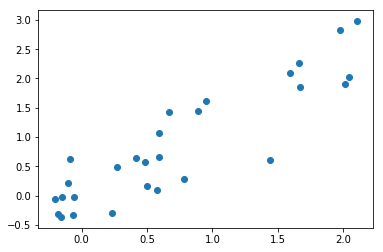

In [43]:
plt.scatter(p_test_rf, y_test["target_t0"])
plt.savefig('../../images/US_consumption/random_forest_test_data.png', bbox_inches="tight")
plt.show()

In [45]:
test_df_rf = y_test[["target_t0"]]*std+mean
test_df_rf["pred_t0"] = p_test_rf*std+mean
test_df_rf["resid_t0"] = test_df_rf["target_t0"].add(-test_df_rf["pred_t0"])
test_df_rf["abs_resid_t0"] = abs(test_df_rf["resid_t0"])
test_df_rf["ape_t0"] = test_df_rf["resid_t0"].div(test_df_rf["target_t0"])

In [46]:
train_df_rf = y_train[["target_t0"]]*std+mean
train_df_rf["pred_t0"] = p_train_rf*std+mean

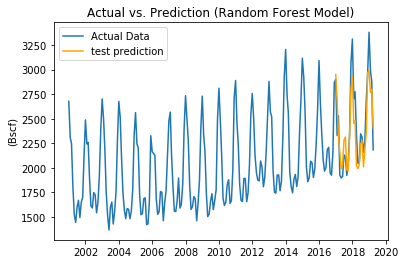

In [47]:
plt.plot(data["energy"], label="Actual Data")
plt.plot(test_df_rf[["pred_t0"]], label="test prediction", color="orange")

plt.title("Actual vs. Prediction (Random Forest Model)")
plt.ylabel("(Bscf)")
plt.legend()
plt.savefig('../../images/US_consumption/random_forest_actual_vs_pred.png', bbox_inches="tight")
plt.show()

In [94]:
test_df_rf.head()

,target_t0,pred_t0,resid_t0,abs_resid_t0,ape_t0
Date,,,,,
2019-04-01,2182.901,2404.973696,-222.072696,222.072696,-0.101733
2019-03-01,2882.561,2799.466354,83.094646,83.094646,0.028827
2019-02-01,2983.892,2765.427775,218.464225,218.464225,0.073215
2019-01-01,3379.295,2991.614644,387.680356,387.680356,0.114722
2018-12-01,2958.554,2963.343146,-4.789146,4.789146,-0.001619


In [98]:
# create csv with rf results
df_fitrf = pd.DataFrame(test_df_rf)
df_fitrf.drop(columns=['target_t0','resid_t0','abs_resid_t0','ape_t0'],inplace=True)
df_fitrf
# df_fitrf.columns = ["Date","ForCon"]
# df_fitrf = df_fitrf.set_index(["Date"])
df_fitrf.to_csv("../../Data/CSV_Files/RandomForestML.csv", encoding='utf-8')
df_fitrf

,pred_t0
Date,
2019-04-01,2404.973696
2019-03-01,2799.466354
2019-02-01,2765.427775
2019-01-01,2991.614644
2018-12-01,2963.343146
2018-11-01,2353.633924
2018-10-01,2178.420531
2018-09-01,2012.189184
2018-08-01,2272.465291


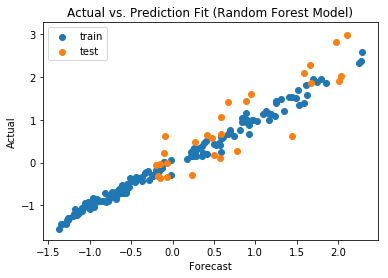

In [48]:
plt.scatter(y=y_train["target_t0"],x=p_train_rf, label="train")
plt.scatter(y=y_test["target_t0"],x=p_test_rf, label="test")
plt.title("Actual vs. Prediction Fit (Random Forest Model)")
plt.ylabel("Actual")
plt.xlabel("Forecast")
plt.legend()
plt.savefig('../../images/US_consumption/random_forest_actual_vs_pred_fit.png', bbox_inches="tight")
plt.show()

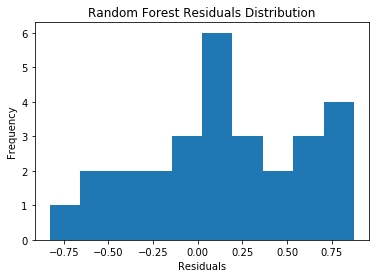

In [50]:
# residual analysis
test_resid.plot.hist(bins=10, title="Random Forest Residuals Distribution")
plt.xlabel("Residuals")
plt.savefig('../../images/US_consumption/random_forest_residuals_distribution.png', bbox_inches="tight")
plt.show()

H0: Data was drawn from a Normal Ditribution
pval 0.7093355059623718 is higher than significance level: 0.05, therefore null hypothesis cannot be rejected


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


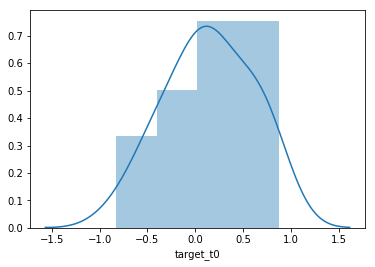

In [51]:
sns.distplot(test_resid)
shapiro_test(test_resid, alpha=0.05)

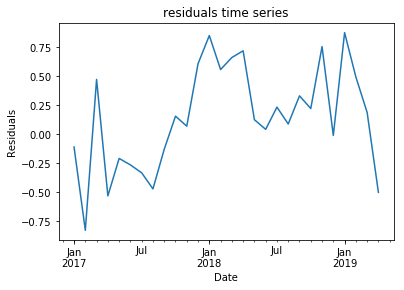

In [53]:
test_resid.plot(title="residuals time series")
plt.ylabel("Residuals")
plt.savefig('../../images/US_consumption/random_forest_residuals_time_series.png', bbox_inches="tight")
plt.show()


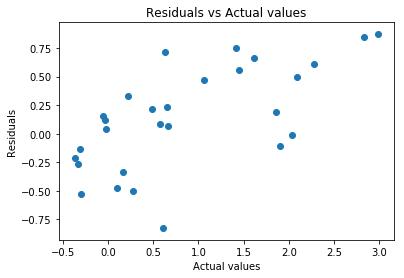

In [54]:
plt.scatter(x=y_test["target_t0"].values, y=test_resid.values)
plt.title("Residuals vs Actual values")
plt.ylabel("Residuals")
plt.xlabel("Actual values")
plt.savefig('../../images/US_consumption/random_forest_residuals_vs_actuals.png', bbox_inches="tight")
plt.show()